In [28]:
from pathlib import Path
import ast

import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In [4]:
root = Path('/source/main/data_download/output/real_test/')

In [6]:
df = pd.DataFrame()
for path_to_file in tqdm(root.glob('*.csv')):
    df = df.append(pd.read_csv(path_to_file))

51it [00:06,  4.58it/s]


In [7]:
df.shape

(179559, 14)

In [8]:
df.dropna(subset=['search_text'], inplace=True)
print(df.shape)

(179559, 14)


In [14]:
df['new_id'] = df['id'] + '_' + df['topic_id'].map(str)

In [16]:
df.drop_duplicates(subset=['id'], inplace=True)
print(df.shape)

(177258, 15)


In [21]:
df['search_text'] = df['search_text'].map(ast.literal_eval)

In [22]:
df['mention'] = df['search_text'].map(lambda x: x[1])

In [25]:
df = df[df['mention'] != '']

In [26]:
df.shape

(159505, 16)

In [ ]:
df['mention_type'].value_counts()

In [41]:
df['len'] = df['mention'].map(lambda x: len(x.split()))

In [44]:
df = df[df['len']<=200]
print(df.shape)

(156142, 18)


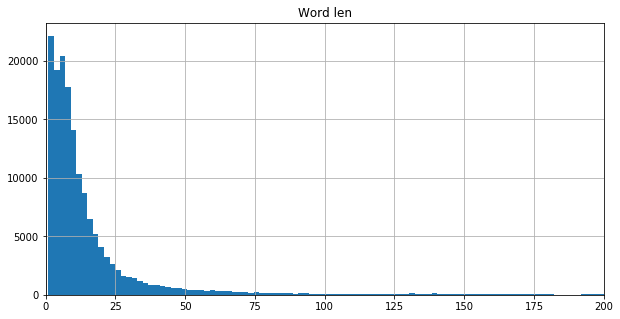

In [47]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
df['len'].hist(bins=100, ax=ax)
ax.set(title='Word len', xlim=(0, 200))
plt.show()

In [53]:
df.drop_duplicates(subset=['mention'], inplace=True)
print(df.shape)

(136716, 18)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_export = df[['new_id', 'mention']].sample(100000, random_state=42)

In [64]:
df_export.to_csv('/source/main/data_download/output/real_test/real_test_data.csv', index=None)

In [65]:
size = 2000
for i in tqdm(range(0, df_export.shape[0], size)):
    df_export.iloc[i:i+size, :].to_csv('/source/main/data_download/output/real_test/chunk_files/%s.csv' % int(i/size), 
                                       index=None)

100%|██████████| 50/50 [00:00<00:00, 135.91it/s]


In [63]:
df_export['mention'].map(lambda x: x.find('giao hàng') != -1).sum()

339